# Load Data

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# reflect database table into classes
engine = create_engine("sqlite:///db/kickstarter_campaigns.sqlite", echo=False)

Base = automap_base()
Base.prepare(engine, reflect=True)
Kickstarter = Base.classes.kickstarter_campaigns

session = Session(engine)

In [3]:
data = engine.execute('SELECT * FROM kickstarter_campaigns')
kickstarter_df = pd.DataFrame()
record_list = []
for record in data:
    record_list.append(record)
    
kickstarter_df = pd.DataFrame(record_list)
kickstarter_df.columns = ['index','backers_count','blurb','country','currency','deadline','fx_rate','goal','id',
                          'name','pledged','slug','state','category_id','category_name','parent_category_id',
                          'creator_profile','creator_name','start_date','campaign_length','month_started','state_or_province',
                          'parent_category','blurb_length','blurb_sentiment_compound','blurb_sentiment_positive',
                          'blurb_sentiment_negative','blurb_sentiment_neutral','title_length','title_sentiment_compound',
                          'title_sentiment_positive','title_sentiment_negative','title_sentiment_neutral','usd_goal',
                          'pct_complete']

kickstarter_df = kickstarter_df.drop(['index'], axis=1)
kickstarter_df = kickstarter_df.reset_index()
kickstarter_df = kickstarter_df.drop(['index'], axis=1)

print(f'{len(kickstarter_df)} rows of data loaded')
kickstarter_df.head()

188137 rows of data loaded


,backers_count,blurb,country,currency,deadline,fx_rate,goal,id,name,pledged,...,blurb_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,title_length,title_sentiment_compound,title_sentiment_positive,title_sentiment_negative,title_sentiment_neutral,usd_goal,pct_complete
0,80,I will be an artist-in-residence at Elsewhere ...,US,USD,2012-04-19 15:16:00,1.0,2800.0,1562040083,Elsewhere Studios artist-in-residency program!,3596.0,...,0.000,0.0,1.000,46,0.0,0.0,0.0,1.0,2800.0,1.284286
1,47,We are looking to bring a Visiting Sculptor fr...,US,USD,2012-04-20 17:06:38,1.0,3900.0,1437561817,Martin Luther King Jr. Sculpture on Campus!,4117.0,...,0.084,0.0,0.916,43,0.0,0.0,0.0,1.0,3900.0,1.055641
2,80,Surrealistic oil paintings capturing the metam...,US,USD,2012-04-16 22:59:00,1.0,750.0,574125813,EMERGENCE: Surreal Oil Paintings by J.J. Long,3125.0,...,0.000,0.0,1.000,45,0.0,0.0,0.0,1.0,750.0,4.166667
3,82,1000 Artists is a public art-making installati...,US,USD,2012-05-07 20:22:25,1.0,4500.0,858990141,1000 Artists: Presidential Inauguration 2013,4586.0,...,0.000,0.0,1.000,44,0.0,0.0,0.0,1.0,4500.0,1.019111
4,31,P.M.A.F.T.W. my upcoming solo show June 2012 a...,US,USD,2012-04-02 21:57:23,1.0,1000.0,566704999,P.M.A.F.T.W.,1036.0,...,0.000,0.0,1.000,12,0.0,0.0,0.0,1.0,1000.0,1.036000


# Create ML Models

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

Using TensorFlow backend.


In [35]:
country_list = list(set(kickstarter_df['country']))
country_dic = {}
for i in range(0, len(country_list)):
    country_dic[country_list[i]] = i
    
currency_list = list(set(kickstarter_df['currency']))
currency_dic = {}
for i in range(0, len(currency_list)):
    currency_dic[currency_list[i]] = i
    
category_name_list = list(set(kickstarter_df['category_name']))
category_name_dic = {}
for i in range(0, len(category_name_list)):
    category_name_dic[category_name_list[i]] = i
    
parent_category_list = list(set(kickstarter_df['parent_category']))
parent_category_dic = {}
for i in range(0, len(parent_category_list)):
    parent_category_dic[parent_category_list[i]] = i
    
month_list = list(set(kickstarter_df['month_started']))
month_dic = {}
for i in range(0, len(month_list)):
    month_dic[month_list[i]] = i

country_encoded_list = []
currency_encoded_list = []
category_encoded_list = []
parent_category_encoded_list = []
month_encoded_list = []

for i in range(0, len(kickstarter_df['country'])):
    country_encoded = country_dic[kickstarter_df['country'][i]]
    country_encoded_list.append(country_encoded)
    category_encoded = category_name_dic[kickstarter_df['category_name'][i]]
    category_encoded_list.append(category_encoded)
    parent_category_encoded = parent_category_dic[kickstarter_df['parent_category'][i]]
    parent_category_encoded_list.append(parent_category_encoded)
    currency_encoded = currency_dic[kickstarter_df['currency'][i]]
    currency_encoded_list.append(currency_encoded)
    month_encoded = month_dic[kickstarter_df['month_started'][i]]
    month_encoded_list.append(month_encoded)

In [6]:
kickstarter_df['country_encoded'] = country_encoded_list
kickstarter_df['currency_encoded'] = currency_encoded_list
kickstarter_df['category_encoded'] = category_encoded_list
kickstarter_df['parent_category_encoded'] = parent_category_encoded_list
kickstarter_df['month_encoded'] = month_encoded_list
kickstarter_df.head()

,backers_count,blurb,country,currency,deadline,fx_rate,goal,id,name,pledged,...,title_sentiment_positive,title_sentiment_negative,title_sentiment_neutral,usd_goal,pct_complete,country_encoded,currency_encoded,category_encoded,parent_category_encoded,month_encoded
0,80,I will be an artist-in-residence at Elsewhere ...,US,USD,2012-04-19 15:16:00,1.0,2800.0,1562040083,Elsewhere Studios artist-in-residency program!,3596.0,...,0.0,0.0,1.0,2800.0,1.284286,4,0,3,7,9
1,47,We are looking to bring a Visiting Sculptor fr...,US,USD,2012-04-20 17:06:38,1.0,3900.0,1437561817,Martin Luther King Jr. Sculpture on Campus!,4117.0,...,0.0,0.0,1.0,3900.0,1.055641,4,0,127,13,9
2,80,Surrealistic oil paintings capturing the metam...,US,USD,2012-04-16 22:59:00,1.0,750.0,574125813,EMERGENCE: Surreal Oil Paintings by J.J. Long,3125.0,...,0.0,0.0,1.0,750.0,4.166667,4,0,82,7,9
3,82,1000 Artists is a public art-making installati...,US,USD,2012-05-07 20:22:25,1.0,4500.0,858990141,1000 Artists: Presidential Inauguration 2013,4586.0,...,0.0,0.0,1.0,4500.0,1.019111,4,0,107,7,9
4,31,P.M.A.F.T.W. my upcoming solo show June 2012 a...,US,USD,2012-04-02 21:57:23,1.0,1000.0,566704999,P.M.A.F.T.W.,1036.0,...,0.0,0.0,1.0,1000.0,1.036000,4,0,82,7,9


In [7]:
X = kickstarter_df.drop(['blurb','country','currency','deadline','fx_rate','id','name','slug','state',
                         'category_id','category_name','parent_category_id','creator_profile',
                         'creator_name', 'start_date', 'month_started','state_or_province','parent_category',
                         'backers_count','pledged', 'pct_complete', 'goal'], axis=1)
              
# X_categorical_data = [kickstarter_df['country'], kickstarter_df['currency'],kickstarter_df['category_name'],
#                  kickstarter_df['parent_category'], kickstarter_df['month_started']]
              
y = kickstarter_df['state']

In [8]:
# FOR SOME REASON THERE WAS A PROBLEM WITH ENCODING THE STATE --- I HAVE REMOVED IT FOR NOW

# country_label_encoder = LabelEncoder()
# currency_label_encoder = LabelEncoder()
# category_label_encoder = LabelEncoder()
# parent_category_label_encoder = LabelEncoder()
# month_label_encoder = LabelEncoder()

# country_label_encoder.fit(kickstarter_df['country'])
# currency_label_encoder.fit(kickstarter_df['currency'])
# category_label_encoder.fit(kickstarter_df['category_name'])
# parent_category_label_encoder.fit(kickstarter_df['parent_category'])
# month_label_encoder.fit(kickstarter_df['month_started'])

# country_encoded = country_label_encoder.transform(kickstarter_df['country'])
# currency_encoded = currency_label_encoder.transform(kickstarter_df['currency'])
# category_encoded = category_label_encoder.transform(kickstarter_df['category_name'])
# parent_category_encoded = parent_category_label_encoder.transform(kickstarter_df['parent_category'])
# month_encoded = month_label_encoder.transform(kickstarter_df['month_started'])

# country_categorical = to_categorical(country_encoded)
# currency_categorical = to_categorical(currency_encoded)
# category_categorical = to_categorical(category_encoded)
# parent_category_categorical = to_categorical(parent_category_encoded)

In [9]:
# X['parent_category'] = parent_category_encoded
# X['country'] = country_encoded
# X['currency'] = currency_encoded
# X['category'] = category_encoded
# X['month'] = month_encoded
X.head()

,campaign_length,blurb_length,blurb_sentiment_compound,blurb_sentiment_positive,blurb_sentiment_negative,blurb_sentiment_neutral,title_length,title_sentiment_compound,title_sentiment_positive,title_sentiment_negative,title_sentiment_neutral,usd_goal,country_encoded,currency_encoded,category_encoded,parent_category_encoded,month_encoded
0,21.96,118,0.0000,0.000,0.0,1.000,46,0.0,0.0,0.0,1.0,2800.0,4,0,3,7,9
1,23.00,135,0.2732,0.084,0.0,0.916,43,0.0,0.0,0.0,1.0,3900.0,4,0,127,13,9
2,19.21,90,0.0000,0.000,0.0,1.000,45,0.0,0.0,0.0,1.0,750.0,4,0,82,7,9
3,40.00,117,0.0000,0.000,0.0,1.000,44,0.0,0.0,0.0,1.0,4500.0,4,0,107,7,9
4,5.00,61,0.0000,0.000,0.0,1.000,12,0.0,0.0,0.0,1.0,1000.0,4,0,82,7,9


In [10]:
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)

In [11]:
y_label_encoder = LabelEncoder()
y_label_encoder.fit(y)
y_encoded = y_label_encoder.transform(y)
y_categorical = to_categorical(y_encoded)

In [12]:
results_df = pd.DataFrame()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest

In [14]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)

In [15]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.16546878801552659, 'category_encoded'),
 (0.12314713290506701, 'usd_goal'),
 (0.091072145583344838, 'title_length'),
 (0.089758625570720063, 'parent_category_encoded'),
 (0.081842213851894219, 'blurb_length'),
 (0.077834405609785509, 'campaign_length'),
 (0.063294477789015813, 'blurb_sentiment_compound'),
 (0.060882374373097077, 'blurb_sentiment_neutral'),
 (0.057640923044694745, 'month_encoded'),
 (0.056471840612101636, 'blurb_sentiment_positive'),
 (0.026054846746090012, 'title_sentiment_compound'),
 (0.024844543335242202, 'title_sentiment_neutral'),
 (0.02246961741461467, 'blurb_sentiment_negative'),
 (0.020757254766548026, 'title_sentiment_positive'),
 (0.014884719289082254, 'currency_encoded'),
 (0.014485101401279739, 'country_encoded'),
 (0.0090909896918954809, 'title_sentiment_negative')]

In [16]:
results_df = results_df.append({"model":"random_forest",
                                "train_score":rf_train_score,
                                "test_score":rf_test_score}, 
                               ignore_index=True)
results_df

,model,test_score,train_score
0,random_forest,0.746721,0.999986


In [43]:
from sklearn.externals import joblib
model_name = 'random_forest'
joblib.dump(rf, f'models/{model_name}.pkl') 

['models/random_forest.pkl']

In [44]:
loaded_model = joblib.load(f'models/{model_name}.pkl')

In [46]:
loaded_model.score(X_test, y_test)

0.74672052726692884

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)
lr_train_score = classifier.score(X_train, y_train)
lr_test_score = classifier.score(X_test, y_test)

In [21]:
results_df = results_df.append({"model":"logistic_regression",
                                "train_score":lr_train_score,
                                "test_score":lr_test_score}, 
                               ignore_index=True)
results_df

,model,test_score,train_score
0,random_forest,0.746721,0.999986
1,logistic_regression,0.605634,0.606901


# K Nearest Neighbors

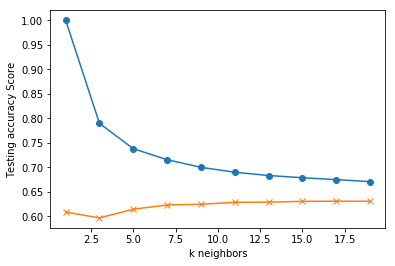

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
results_df = results_df.append({"model":"k_nearest_neigbors_9",
                                "train_score":train_scores[3],
                                "test_score":test_scores[3]}, 
                               ignore_index=True)
results_df

,model,test_score,train_score
0,random_forest,0.746721,0.999986
1,logistic_regression,0.605634,0.606901
2,k_nearest_neigbors_9,0.623259,0.715617


# SVM

In [24]:
# from sklearn.svm import SVC

# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

# svm_train_score = model.score(X_train, y_train)
# svm_test_score = model.score(X_test, y_test)

In [25]:
# results_df = results_df.append({"model":"svm",
#                                 "train_score":svm_train_score,
#                                 "test_score":svm_test_score}, 
#                                ignore_index=True)
# results_df

# Neural Networks

In [26]:
X_train, X_test, y_cat_train, y_cat_test = train_test_split(X, y_categorical, random_state=42)

In [27]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=17))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=3,activation="softmax"))

model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['accuracy'])

model.fit(
    X_train,
    y_cat_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
 - 11s - loss: 0.2928 - acc: 0.5607
Epoch 2/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 3/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 4/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 5/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 6/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 7/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 8/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 9/10
 - 11s - loss: 0.2921 - acc: 0.5618
Epoch 10/10
 - 11s - loss: 0.2921 - acc: 0.5618


In [33]:
model_loss, nn_train_score = model.evaluate(X_train, y_cat_train, verbose=2)
model_loss, nn_test_score = model.evaluate(X_test, y_cat_test, verbose=2)

results_df = results_df.append({"model":"neural_network",
                                "train_score":nn_train_score,
                                "test_score":nn_test_score}, 
                               ignore_index=True)
results_df

,model,test_score,train_score
0,random_forest,0.746721,0.999986
1,logistic_regression,0.605634,0.606901
2,k_nearest_neigbors_9,0.623259,0.715617
3,neural_network,0.561412,0.561821


# Dictionary of Encoded Categorical Features to Feature Names

In [40]:
print('country_dic:')
print(country_dic)
print('currency_dic:')
print(currency_dic)
print('category_name_dic:')
print(category_name_dic)
print('parent_category_dic:')
print(parent_category_dic)
print('month_dic:')
print(month_dic)

country_dic:
{'CH': 0, 'IE': 1, 'DK': 2, 'FR': 3, 'US': 4, 'SE': 5, 'ES': 6, 'GB': 7, 'AU': 8, 'IT': 9, 'LU': 10, 'BE': 11, 'DE': 12, 'CA': 13, 'SG': 14, 'AT': 15, 'JP': 16, 'NO': 17, 'NL': 18, 'NZ': 19, 'MX': 20, 'HK': 21}
currency_dic:
{'USD': 0, 'EUR': 1, 'MXN': 2, 'HKD': 3, 'JPY': 4, 'NZD': 5, 'SGD': 6, 'AUD': 7, 'GBP': 8, 'CAD': 9, 'NOK': 10, 'SEK': 11, 'DKK': 12, 'CHF': 13}
category_name_dic:
{'Publishing': 0, 'Nonfiction': 1, 'Web': 2, 'Mixed Media': 3, 'Classical Music': 4, 'Journalism': 5, 'Tabletop Games': 6, 'Country & Folk': 7, 'Installations': 8, 'Embroidery': 9, 'Indie Rock': 10, 'Faith': 11, 'Academic': 12, 'Comic Books': 13, 'Accessories': 14, 'Vegan': 15, 'Art Books': 16, 'Residencies': 17, 'Latin': 18, 'Hardware': 19, 'Glass': 20, 'Candles': 21, 'Bacon': 22, 'Product Design': 23, 'Food': 24, 'Literary Spaces': 25, 'Illustration': 26, 'Television': 27, "Children's Books": 28, 'Makerspaces': 29, 'Webseries': 30, 'Fine Art': 31, 'Animation': 32, 'Pottery': 33, 'Festivals